In [2]:
import pandas as pd
import json
import os

import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, average_precision_score
import matplotlib.pyplot as plt

In [5]:
path = "../data/bce/"
files = os.listdir(path)

In [20]:
test_data = pd.read_csv("../data/test.csv")
test_data.head()

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/test/patient64741/study1/v...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/test/patient64742/study1/v...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/test/patient64743/study1/v...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/test/patient64744/study1/v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,CheXpert-v1.0-small/test/patient64744/study1/v...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
from src.datasets.labels import labels_dict

In [68]:
cases = labels_dict.keys()
cases

dict_keys(['pneumonia', 'chexternal', 'chexternal_pneumo', 'chexpert'])

In [100]:
ground_truth_full = {}
for key, labels in labels_dict.items():
    ground_truth_full[key] = test_data[labels].values

In [63]:
output_files = {
    'pneumonia': 'output_raw_pneumonia.json',
    'chexternal': 'output_raw_chexternal.json',
    'chexternal_pneumo': 'output_raw_chexternal_pneumo.json',
    'chexpert': 'output_raw_chexpert.json',
}

In [65]:
output_data_full = {}
for key in output_files.keys():
    with open(path + output_files[key]) as f:
        output_data_full[key] = json.load(f)

dict_keys(['pneumonia', 'chexternal', 'chexternal_pneumo', 'chexpert'])

## Compute all average AUCs and F1s for each model separately per case and save them in dict

In [86]:
output_data_full['pneumonia']['densenet121_best.pt']

{'0': [0.038873571902513504],
 '1': [0.06096341088414192],
 '2': [0.05821841210126877],
 '3': [0.06886280328035355],
 '4': [0.11841120570898056],
 '5': [0.053576089441776276],
 '6': [0.10151170194149017],
 '7': [0.10109243541955948],
 '8': [0.06578231602907181],
 '9': [0.10011064261198044],
 '10': [0.141642764210701],
 '11': [0.04791003465652466],
 '12': [0.04826774448156357],
 '13': [0.043153561651706696],
 '14': [0.03453495353460312],
 '15': [0.08937342464923859],
 '16': [0.03702470287680626],
 '17': [0.10952853411436081],
 '18': [0.018022283911705017],
 '19': [0.04823452979326248],
 '20': [0.06294920295476913],
 '21': [0.09505623579025269],
 '22': [0.0972241535782814],
 '23': [0.052671536803245544],
 '24': [0.0633450374007225],
 '25': [0.04486265406012535],
 '26': [0.05183364078402519],
 '27': [0.03266061097383499],
 '28': [0.062387268990278244],
 '29': [0.07457367330789566],
 '30': [0.04595320299267769],
 '31': [0.015374181792140007],
 '32': [0.06403960287570953],
 '33': [0.0770945

In [217]:
def convert_output_dict_to_numpy(dict):
    list = []
    for i in range(len(dict)):
        list.append(dict[str(i)])
    return np.array(list)

In [91]:
auc_basic = {}
f1_basic = {}
for case in cases:
    auc_basic[case] = {}
    f1_basic[case] = {}
    for model in output_data_full[case].keys():
        prediction = convert_output_dict_to_numpy(output_data_full[case][model])
        auc_basic[case][model] = roc_auc_score(ground_truth_full[case], prediction, average='macro')
        f1_basic[case][model] = f1_score(ground_truth_full[case], prediction > 0.5, average='macro')
        average_precision_score(ground_truth_full[case], prediction)

In [111]:
auc_classes = {}
f1_classes = {}
for case in cases:
    auc_classes[case] = {}
    f1_classes[case] = {}
    for model in output_data_full[case].keys():
        prediction = convert_output_dict_to_numpy(output_data_full[case][model])
        auc_classes[case][model] = roc_auc_score(ground_truth_full[case], prediction, average=None)
        f1_classes[case][model] = f1_score(ground_truth_full[case], prediction > 0.5, average=None)

In [168]:
auc_classes

{'pneumonia': {'densenet121_best.pt': 0.7036915683704674,
  'resnext101_32x8d_best.pt': 0.7228047182175623,
  'efficientnet_b1_best.pt': 0.717999126256007,
  'resnet50_best.pt': 0.685998252512014,
  'resnext101_64x4d_best.pt': 0.682175622542595,
  'resnext50_32x4d_best.pt': 0.7130843162953255,
  'efficientnet_v2_s_best.pt': 0.6835954565312363,
  'densenet161_best.pt': 0.6780253385757973,
  'efficientnet_v2_m_best.pt': 0.6788990825688074,
  'resnet152_best.pt': 0.7072957623416338,
  'efficientnet_b2_best.pt': 0.7447575360419397,
  'resnet101_best.pt': 0.7379860200961118},
 'chexternal': {'densenet121_best.pt': array([0.8377166 , 0.89335082, 0.77661927, 0.78956661, 0.93765207]),
  'resnext101_32x8d_best.pt': array([0.84286294, 0.91425689, 0.78749718, 0.80288925, 0.93333333]),
  'efficientnet_b1_best.pt': array([0.80897131, 0.90315811, 0.75558565, 0.8220133 , 0.93085462]),
  'resnet50_best.pt': array([0.83574616, 0.90329936, 0.71108102, 0.78062371, 0.89980231]),
  'resnext101_64x4d_best.p

In [247]:
def get_auc_label_num_pair_for_class(auc_scores: dict, label: str = "Pneumonia"):
    from src.datasets.labels import labels_dict
    cases = labels_dict.keys()
    scores = {}
    for model in auc_scores["pneumonia"].keys():
        scores[model] = []
    label_nums = []
    # iterate through all possible cases
    for case in cases:
        # check if the label is even in the case
        if label is None:
            # get x-value (number of labels in case)
            label_nums.append(len(labels_dict[case]))
            # get y-values (auc scores for the label in the case per model)
            for model in auc_scores[case].keys():
                score = auc_scores[case][model]
                scores[model].append(score)
        elif label in labels_dict[case]:
            # get x-value (number of labels in case)
            label_nums.append(len(labels_dict[case]))
            # get y-values (auc scores for the label in the case per model)
            for model in auc_scores[case].keys():
                if case == 'pneumonia':
                    score = auc_scores[case][model]
                else:
                    score = auc_scores[case][model][labels_dict[case].index(label)]
                scores[model].append(score)
    return label_nums, scores

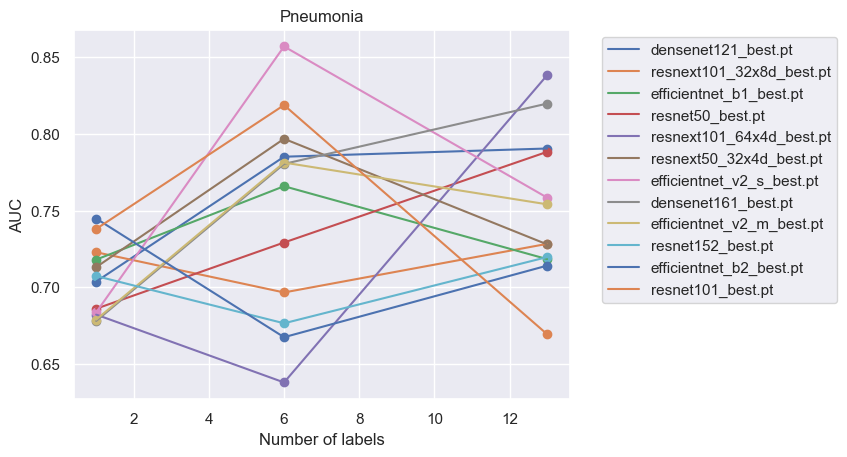

In [156]:
label_nums, scores = get_auc_label_num_pair_for_class(auc_classes, "Pneumonia")
for model in scores.keys():
    plt.plot(label_nums, scores[model], label=model)
    # only plot points for label numbers that are in the data
    plt.scatter(label_nums, scores[model])
    # set x and y labels
    plt.xlabel("Number of labels")
    plt.ylabel("AUC")
    # set legend outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("Pneumonia")
    plt.savefig("../data/auc_pneumonia.png", bbox_inches='tight')

In [160]:
# repeat the above for each class
for idx, label in enumerate(labels_dict['chexternal_pneumo']):
    label_nums, scores = get_auc_label_num_pair_for_class(auc_classes, label)
    for model in scores.keys():
        plt.plot(label_nums, scores[model], label=model)
        # only plot points for label numbers that are in the data
        plt.scatter(label_nums, scores[model])
        # set x and y labels
        plt.xlabel("Number of labels")
        plt.ylabel("AUC")
        # set legend outside of the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(label)
        plt.savefig(f"../data/auc_{label}.png", bbox_inches='tight')
    plt.close()

In [248]:
# repeat the above for average auc
label_nums, scores = get_auc_label_num_pair_for_class(auc_basic, None)
for model in scores.keys():
    plt.plot(label_nums, scores[model], label=model)
    # only plot points for label numbers that are in the data
    plt.scatter(label_nums, scores[model])
    # set x and y labels
    plt.xlabel("Number of labels")
    plt.ylabel("AUC")
    # set legend outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("Average AUC")
    plt.savefig(f"../data/auc_average.png", bbox_inches='tight')
plt.close()

## Compute performance of AUC-weighted Ensembles


In [166]:
output_data_full['chexternal'].keys()

dict_keys(['densenet121_best.pt', 'resnext101_32x8d_best.pt', 'efficientnet_b1_best.pt', 'resnet50_best.pt', 'resnext101_64x4d_best.pt', 'resnext50_32x4d_best.pt', 'efficientnet_v2_s_best.pt', 'densenet161_best.pt', 'efficientnet_v2_m_best.pt', 'resnet152_best.pt', 'efficientnet_b2_best.pt', 'resnet101_best.pt'])

In [200]:
def get_ensemble_equally_weighted_predictions(predictions: dict):
    # get predictions for ensemble of all models, equally weighted
    models = predictions.keys()
    predictions_numpy = {}
    for model in models:
        # convert all to numpy
        predictions_numpy[model] = convert_output_dict_to_numpy(predictions[model])
    ensemble_predictions = np.zeros(predictions_numpy[list(models)[0]].shape)
    for model in models:
        ensemble_predictions += predictions_numpy[model]
    ensemble_predictions /= len(models)

    return ensemble_predictions

In [230]:
def get_ensemble_auc_weighted_prediction(predictions: dict, auc_scores: dict, class_wise: bool = False):
    # get predictions for ensemble of all models, weighted by their respective auc scores
    # either weighted by average auc score or per-class auc scores
    models = predictions.keys()
    predictions_numpy = {}
    for model in models:
        # convert all to numpy
        predictions_numpy[model] = convert_output_dict_to_numpy(predictions[model])
    ensemble_predictions = np.zeros(predictions_numpy[list(models)[0]].shape)
    # first, multiply each prediction with the model's corresponding auc score
    # numpy computation allows to do this for both average (float) auc scores and per-class auc arrays
    for model in models:
        ensemble_predictions += auc_scores[model] * predictions_numpy[model]
    # then, divide by the sum of all auc scores
    # depending on whether the auc scores are average auc scores or per-class auc arrays, the sum is computed differently
    if class_wise:
        ensemble_predictions /= np.sum(list(auc_scores.values()), axis=0)
    else:
        ensemble_predictions /= np.sum(list(auc_scores.values()))

    return ensemble_predictions

In [202]:
def get_auc_choice_dict(auc_scores: dict):
    # takes auc scores for each model and returns a dictionary of arrays,
    # where each entry is a truth array of which class predictions to count for the model
    models = auc_scores.keys()
    n_labels = len(auc_scores[list(models)[0]])
    auc_choice_dict = {}

    for model in models:
        auc_choice_dict[model] = np.zeros(n_labels)

    for i in range(n_labels):
        best_model = np.argmax([auc_scores[model][i] for model in models])
        auc_choice_dict[list(models)[best_model]][i] = 1

    return auc_choice_dict

def get_ensemble_auc_best_prediction(auc_scores: dict, predictions: dict):
    # get predictions by model with highest auc score for each class
    models = predictions.keys()
    predictions_numpy = {}
    for model in models:
        # convert all to numpy
        predictions_numpy[model] = convert_output_dict_to_numpy(predictions[model])

    # get truth dict for the models
    auc_choice_dict = get_auc_choice_dict(auc_scores)

    ensemble_predictions = np.zeros(predictions_numpy[list(models)[0]].shape)
    for model in models:
        ensemble_predictions += auc_choice_dict[model] * predictions_numpy[model]

    return ensemble_predictions

In [203]:
# set up tracking dict for the different ensembling types
auc_ensembles = {
    "equally_weighted": {},
    "auc_weighted": {},
    "auc_weighted_class_wise": {},
    "auc_best": {}
}

In [235]:
auc_ensembles

{'equally_weighted': {'pneumonia': 0.7305591961555264,
  'chexternal': 0.861350463923254,
  'chexternal_pneumo': 0.8510660561147905,
  'chexpert': 0.8199947173908562},
 'auc_weighted': {'pneumonia': 0.7315421581476627,
  'chexternal': 0.8612839656027085,
  'chexternal_pneumo': 0.8512080161025738,
  'chexpert': 0.820193035804344},
 'auc_weighted_class_wise': {'pneumonia': 0.7315421581476627},
 'auc_best': {}}

In [236]:
# compute auc for equally weighted ensemble
for case in cases:
    auc_ensembles["equally_weighted"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_equally_weighted_predictions(output_data_full[case]), average='macro')
    auc_ensembles["auc_weighted"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_auc_weighted_prediction(output_data_full[case], auc_classes[case], class_wise=False), average='macro')
    auc_ensembles["auc_weighted_class_wise"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_auc_weighted_prediction(output_data_full[case], auc_classes[case], class_wise=True), average='macro')

In [239]:
auc_ensembles_class = {
    "equally_weighted": {},
    "auc_weighted": {},
    "auc_weighted_class_wise": {},
    "auc_best": {}
}

In [241]:
# compute auc for equally weighted ensemble
for case in cases:
    auc_ensembles_class["equally_weighted"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_equally_weighted_predictions(output_data_full[case]), average=None)
    auc_ensembles_class["auc_weighted"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_auc_weighted_prediction(output_data_full[case], auc_classes[case], class_wise=False), average=None)
    auc_ensembles_class["auc_weighted_class_wise"][case] = roc_auc_score(ground_truth_full[case], get_ensemble_auc_weighted_prediction(output_data_full[case], auc_classes[case], class_wise=True), average=None)

In [243]:
auc_ensembles

{'equally_weighted': {'pneumonia': 0.7305591961555264,
  'chexternal': 0.861350463923254,
  'chexternal_pneumo': 0.8510660561147905,
  'chexpert': 0.8199947173908562},
 'auc_weighted': {'pneumonia': 0.7315421581476627,
  'chexternal': 0.8616307710299109,
  'chexternal_pneumo': 0.8521095160171225,
  'chexpert': 0.8221088875839797},
 'auc_weighted_class_wise': {'pneumonia': 0.7315421581476627,
  'chexternal': 0.8616307710299109,
  'chexternal_pneumo': 0.8521095160171225,
  'chexpert': 0.8221088875839797},
 'auc_best': {}}

In [242]:
auc_ensembles_class

{'equally_weighted': {'pneumonia': 0.7305591961555264,
  'chexternal': array([0.86030716, 0.90753708, 0.77558113, 0.82211649, 0.94121046]),
  'chexternal_pneumo': array([0.87048392, 0.90733528, 0.78348003, 0.80474662, 0.93672445,
         0.80362604]),
  'chexpert': array([0.56553601, 0.85686468, 0.83190665, 0.78800786, 0.90826355,
         0.78343489, 0.79729139, 0.80717725, 0.92051672, 0.93885341,
         0.90909091, 0.64274924, 0.91023877])},
 'auc_weighted': {'pneumonia': 0.7315421581476627,
  'chexternal': array([0.86051579, 0.90775906, 0.77621304, 0.8222426 , 0.94142336]),
  'chexternal_pneumo': array([0.87080846, 0.90735546, 0.7840668 , 0.80509058, 0.93701338,
         0.80832241]),
  'chexpert': array([0.56825685, 0.85752535, 0.83448369, 0.79379642, 0.90828373,
         0.7849244 , 0.79882045, 0.80777345, 0.92218845, 0.93909672,
         0.91193182, 0.64929507, 0.91103917])},
 'auc_weighted_class_wise': {'pneumonia': 0.7315421581476627,
  'chexternal': array([0.86051579, 0.907

In [238]:
auc_basic

{'pneumonia': {'densenet121_best.pt': 0.7036915683704674,
  'resnext101_32x8d_best.pt': 0.7228047182175623,
  'efficientnet_b1_best.pt': 0.717999126256007,
  'resnet50_best.pt': 0.685998252512014,
  'resnext101_64x4d_best.pt': 0.682175622542595,
  'resnext50_32x4d_best.pt': 0.7130843162953255,
  'efficientnet_v2_s_best.pt': 0.6835954565312363,
  'densenet161_best.pt': 0.6780253385757973,
  'efficientnet_v2_m_best.pt': 0.6788990825688074,
  'resnet152_best.pt': 0.7072957623416338,
  'efficientnet_b2_best.pt': 0.7447575360419397,
  'resnet101_best.pt': 0.7379860200961118},
 'chexternal': {'densenet121_best.pt': 0.846981076158389,
  'resnext101_32x8d_best.pt': 0.8561679164904609,
  'efficientnet_b1_best.pt': 0.8441165977941042,
  'resnet50_best.pt': 0.8261105133110662,
  'resnext101_64x4d_best.pt': 0.7882935446218253,
  'resnext50_32x4d_best.pt': 0.8299866896571931,
  'efficientnet_v2_s_best.pt': 0.8374853796610902,
  'densenet161_best.pt': 0.8351510080934543,
  'efficientnet_v2_m_best.pt

<BarContainer object of 4 artists>

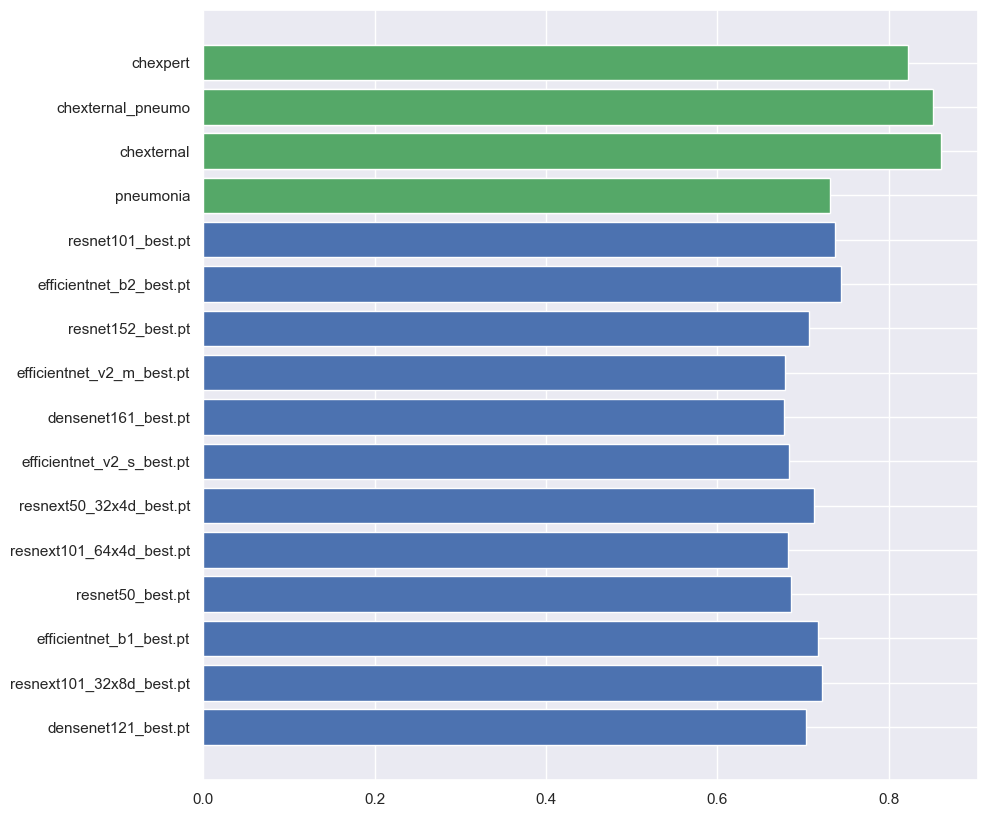

In [245]:
# plot auc_basics as horizontal bar chart, all in one chart

for case in cases:
    plt.barh(list(auc_basic[case].keys()), list(auc_basic[case].values()))
    plt.xlabel("AUC")
    plt.title(case)

In [249]:
auc_ensembles


{'equally_weighted': {'pneumonia': 0.7305591961555264,
  'chexternal': 0.861350463923254,
  'chexternal_pneumo': 0.8510660561147905,
  'chexpert': 0.8199947173908562},
 'auc_weighted': {'pneumonia': 0.7315421581476627,
  'chexternal': 0.8616307710299109,
  'chexternal_pneumo': 0.8521095160171225,
  'chexpert': 0.8221088875839797},
 'auc_weighted_class_wise': {'pneumonia': 0.7315421581476627,
  'chexternal': 0.8616307710299109,
  'chexternal_pneumo': 0.8521095160171225,
  'chexpert': 0.8221088875839797},
 'auc_best': {}}

In [250]:
auc_basic


{'pneumonia': {'densenet121_best.pt': 0.7036915683704674,
  'resnext101_32x8d_best.pt': 0.7228047182175623,
  'efficientnet_b1_best.pt': 0.717999126256007,
  'resnet50_best.pt': 0.685998252512014,
  'resnext101_64x4d_best.pt': 0.682175622542595,
  'resnext50_32x4d_best.pt': 0.7130843162953255,
  'efficientnet_v2_s_best.pt': 0.6835954565312363,
  'densenet161_best.pt': 0.6780253385757973,
  'efficientnet_v2_m_best.pt': 0.6788990825688074,
  'resnet152_best.pt': 0.7072957623416338,
  'efficientnet_b2_best.pt': 0.7447575360419397,
  'resnet101_best.pt': 0.7379860200961118},
 'chexternal': {'densenet121_best.pt': 0.846981076158389,
  'resnext101_32x8d_best.pt': 0.8561679164904609,
  'efficientnet_b1_best.pt': 0.8441165977941042,
  'resnet50_best.pt': 0.8261105133110662,
  'resnext101_64x4d_best.pt': 0.7882935446218253,
  'resnext50_32x4d_best.pt': 0.8299866896571931,
  'efficientnet_v2_s_best.pt': 0.8374853796610902,
  'densenet161_best.pt': 0.8351510080934543,
  'efficientnet_v2_m_best.pt

In [251]:
# read training data of CheXpert
train_data = pd.read_csv("../data/train.csv")
# plot label distribution as bar chart
train_data.sum(axis=0).plot.bar()
plt.title("Label distribution in training data")


C:\Users\Amar\AppData\Local\Temp\ipykernel_21456\2986577808.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.sum(axis=0).plot.bar()


TypeError: no numeric data to plot

In [4]:
val_data = pd.read_csv("../data/valid.csv")

In [7]:
# convert all val labels to integer
for label in val_data.columns[5:]:
    val_data[label] = val_data[label].astype(int)

In [8]:
val_data


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0,1,0,1,0,1,0,0,0,0,0,0,0,0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,1
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0,0,0,0,0,0,0,0,0,0,0,0,0,1
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0,1,1,1,0,1,0,0,0,0,0,0,0,1
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0,1,0,0,0,0,0,0,0,0,0,0,0,0


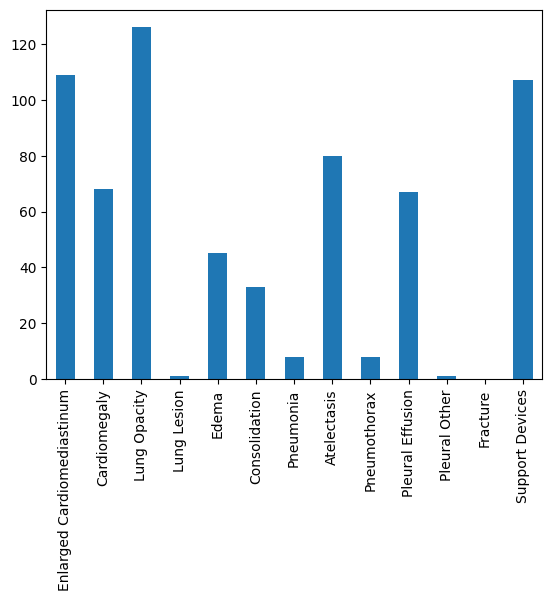

In [19]:
# plot label distribution as bar chart
val_data[val_data.columns[6:]].sum(axis=0).plot.bar()
# export to png
plt.savefig("../data/label_distribution_val.png", bbox_inches='tight')

In [16]:
test_data = pd.read_csv("../data/test.csv")
# convert all test labels to integer
for label in test_data.columns[2:]:
    test_data[label] = test_data[label].astype(int)

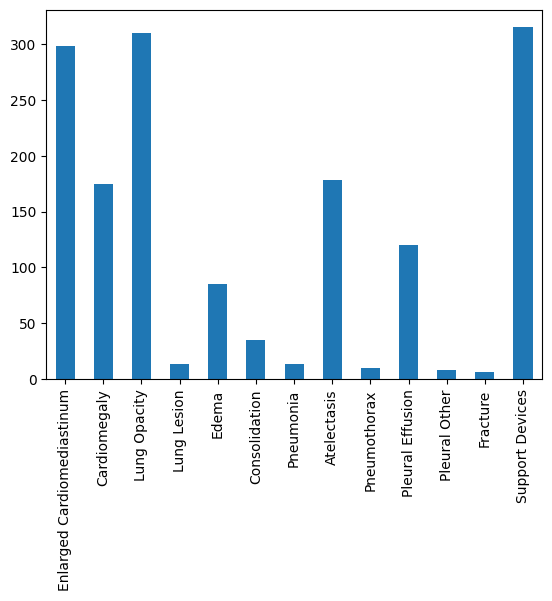

In [18]:
# plot label distribution as bar chart
test_data[test_data.columns[2:]].sum(axis=0).plot.bar()
# export to png
plt.savefig("../data/label_distribution_test.png", bbox_inches='tight')